## Get the data

The images are from Food101 dataset which is 101 classes of food.Howev4r, the data is modified to only include two classes of food which are (pizza & steak)|

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-07-09 21:16:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  23.8MB/s    in 4.4s    

2021-07-09 21:16:43 (23.8 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

In [5]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 1 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


In [ ]:
# The extra file in  the pizza steak directory is '.DS_Store'
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul  8 11:01 .
drwxr-xr-x 1 root root 4096 Jul  8 11:01 ..
-rw-r--r-- 1 root root 6148 Jul  8 11:01 .DS_Store
drwxr-xr-x 4 root root 4096 Jul  8 11:01 test
drwxr-xr-x 4 root root 4096 Jul  8 11:01 train


In [ ]:
# Number of images in each class
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_pizza_images_train = len(os.listdir('pizza_steak/train/pizza'))
num_steak_images_test = len(os.listdir('pizza_steak/test/steak'))
num_pizza_images_test = len(os.listdir('pizza_steak/test/pizza'))
(num_steak_images_train, num_pizza_images_train), (num_steak_images_test, num_pizza_images_test)

((750, 750), (250, 250))

In [ ]:
# Get the pathnames programetically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory to view images from
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  # Show the size image
  print(f'Image Shape: {img.shape}')
  return img


['493029.jpg']
Image Shape: (384, 512, 3)


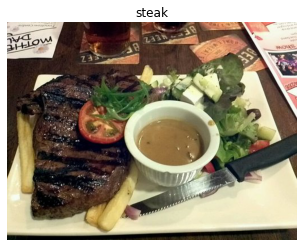

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[149, 132, 122],
        [176, 159, 149],
        [198, 181, 171],
        ...,
        [229, 229, 217],
        [251, 251, 239],
        [241, 241, 229]],

       [[202, 185, 175],
        [227, 210, 200],
        [237, 220, 210],
        ...,
        [248, 248, 236],
        [252, 252, 240],
        [249, 249, 237]],

       [[195, 178, 168],
        [225, 208, 198],
        [239, 222, 212],
        ...,
        [255, 255, 244],
        [244, 242, 230],
        [240, 238, 226]],

       ...,

       [[ 11,  20,  15],
        [  5,  14,   9],
        [  1,  10,   5],
        ...,
        [ 64,  51,  35],
        [ 65,  52,  36],
        [ 59,  46,  30]],

       [[  0,  11,   3],
        [  4,  15,   7],
        [  6,  17,   9],
        ...,
        [ 55,  42,  26],
        [ 59,  46,  30],
        [ 57,  44,  28]],

       [[  0,   4,   0],
        [  4,  15,   7],
        [ 14,  25,  17],
        ...,
        [ 54,  41,  2

In [ ]:
img.shape

(384, 512, 3)

In [ ]:
img.max(), img.min()

(255, 0)

In [ ]:
img / 255.

array([[[0.58431373, 0.51764706, 0.47843137],
        [0.69019608, 0.62352941, 0.58431373],
        [0.77647059, 0.70980392, 0.67058824],
        ...,
        [0.89803922, 0.89803922, 0.85098039],
        [0.98431373, 0.98431373, 0.9372549 ],
        [0.94509804, 0.94509804, 0.89803922]],

       [[0.79215686, 0.7254902 , 0.68627451],
        [0.89019608, 0.82352941, 0.78431373],
        [0.92941176, 0.8627451 , 0.82352941],
        ...,
        [0.97254902, 0.97254902, 0.9254902 ],
        [0.98823529, 0.98823529, 0.94117647],
        [0.97647059, 0.97647059, 0.92941176]],

       [[0.76470588, 0.69803922, 0.65882353],
        [0.88235294, 0.81568627, 0.77647059],
        [0.9372549 , 0.87058824, 0.83137255],
        ...,
        [1.        , 1.        , 0.95686275],
        [0.95686275, 0.94901961, 0.90196078],
        [0.94117647, 0.93333333, 0.88627451]],

       ...,

       [[0.04313725, 0.07843137, 0.05882353],
        [0.01960784, 0.05490196, 0.03529412],
        [0.00392157, 0

## Create a Neural Network Model

In [ ]:
# Create the model
model_2 = tf.keras.models.Sequential()

# Add the input layer
model_2.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))

# Add the flatten layer and reshape the data from (224, 224, 3) to (None, 150528)
model_2.add(tf.keras.layers.Flatten())

# Add the hidden layers
model_2.add(tf.keras.layers.Dense(units=4, activation='relu'))
model_2.add(tf.keras.layers.Dense(units=4, activation='relu'))

# Add the output layer
model_2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Print the model summary
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

In [ ]:
# Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.7249 - binary_accuracy: 0.5180 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - binary_accuracy: 0.4893 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - binary_accuracy: 0.5000 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - binary_accuracy: 0.4827 - val_loss: 0.6931 - val_binary_accuracy: 0.5000


### Improve the model

In [ ]:
# Create the model
model_3 = tf.keras.models.Sequential()

# Add the input layer
model_3.add(tf.keras.layers.InputLayer(input_shape=(224, 224, 3)))

# Add the flatten layer
model_3.add(tf.keras.layers.Flatten())

# Add the hidden layers
model_3.add(tf.keras.layers.Dense(units=100, activation='relu'))
model_3.add(tf.keras.layers.Dense(units=50, activation='relu'))
model_3.add(tf.keras.layers.Dense(units=10, activation='relu'))

# Add the output layer
model_3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Print the model summary
model_3.summary()



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 15,058,471
Trainable params: 15,058,471
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.metrics.binary_accuracy])

# Create Learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 5e-4 * 10**(epoch/20))

n_epochs = 5

model_3.fit(train_data,
            epochs=n_epochs, 
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data),
            callbacks=[lr_scheduler],
            verbose=1)

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3417 - binary_accuracy: 0.8533 - val_loss: 0.4626 - val_binary_accuracy: 0.7840
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.2803 - binary_accuracy: 0.8953 - val_loss: 0.4497 - val_binary_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.2385 - binary_accuracy: 0.9127 - val_loss: 0.4527 - val_binary_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.2484 - binary_accuracy: 0.9027 - val_loss: 0.4491 - val_binary_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.2195 - binary_accuracy: 0.9213 - val_loss: 0.5464 - val_binary_accuracy: 0.7620


## Creating a new CNN model (Regularization with data augmenting)

### Import amd load the data

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define `train` and `test` images directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Instantiate ImageDataGenerator and resacale train and test data
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Instantiate ImageDataGenerator and generate new and more diverse train data
train_data_gen_aug = ImageDataGenerator(rotation_range=0.2,
                                        width_shift_range=0.2, 
                                        height_shift_range=0.2, 
                                        shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True, 
                                        vertical_flip=True,
                                        rescale=1./255)

# Flow the data generator with files from directory
train_data = train_data_gen.flow_from_directory(directory=train_dir, 
                                   target_size=(224, 244), 
                                   class_mode='binary',
                                   batch_size=32, 
                                   seed=42)
test_data = test_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224), 
                                              class_mode='binary', 
                                              batch_size=32, 
                                              seed=42)
train_data_aug = train_data_gen_aug.flow_from_directory(directory=train_dir,
                                                        target_size=(224, 224),
                                                        class_mode='binary',
                                                        batch_size=32,
                                                        seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


### Explore the data

In [3]:
# Explore the data
train_images, train_labels = train_data.next()
train_images_aug, train_labels_aug = train_data_aug.next()
test_images_aug, test_labels_aug = test_data.next()
print('train_data:     ', len(train_data), train_images.shape, train_labels.shape)
print('train_data_aug: ', len(train_data_aug), train_images_aug.shape, train_labels_aug.shape)
print('test_data:      ', len(test_data), test_images_aug.shape, test_labels_aug.shape)

train_data:      47 (32, 224, 244, 3) (32,)
train_data_aug:  47 (32, 224, 224, 3) (32,)
test_data:       16 (32, 224, 224, 3) (32,)


In [4]:
# Explore the data
print('train_data first 10 lables:     ', train_labels_aug[:10])
print('train_data_aug first 10 lables: ', train_labels[:10])
print('test_data first 10 lables:      ', train_labels[:10])

train_data first 10 lables:      [1. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
train_data_aug first 10 lables:  [1. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
test_data first 10 lables:       [1. 1. 0. 0. 0. 1. 1. 0. 1. 0.]


In [5]:
# Explore data
train_images_aug[0]

array([[[0.42768374, 0.43529415, 0.48635212],
        [0.42768785, 0.43529415, 0.4863535 ],
        [0.42769194, 0.43529415, 0.48635483],
        ...,
        [0.5653499 , 0.5755957 , 0.6340395 ],
        [0.5562638 , 0.5716837 , 0.6287352 ],
        [0.5334386 , 0.55817246, 0.61706865]],

       [[0.4523661 , 0.47589555, 0.5307975 ],
        [0.45239618, 0.4759256 , 0.5308276 ],
        [0.45242625, 0.47595567, 0.5308577 ],
        ...,
        [0.3936459 , 0.42162356, 0.48035923],
        [0.34807152, 0.3787515 , 0.4300255 ],
        [0.2858716 , 0.31696722, 0.3643152 ]],

       [[0.35876796, 0.38229737, 0.43719932],
        [0.3588117 , 0.38234112, 0.43724307],
        [0.35885546, 0.38238487, 0.43728682],
        ...,
        [0.11765303, 0.14508015, 0.18160152],
        [0.12282869, 0.14680722, 0.17471397],
        [0.12517685, 0.14054184, 0.16194372]],

       ...,

       [[0.33333334, 0.27450982, 0.24705884],
        [0.33333334, 0.27450982, 0.24705884],
        [0.33333334, 0

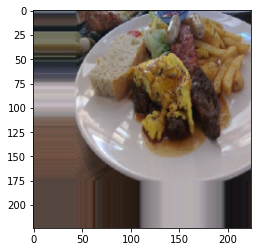

In [6]:
# Explore the augmented data
import matplotlib.pyplot as plt

plt.imshow(train_images_aug[0]);

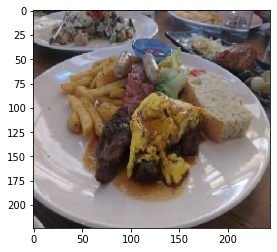

In [7]:
# Explore the data
plt.imshow(train_images[0]);

### Create, compile, and fit the model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.activations import relu, sigmoid

# create the model
model_4 = Sequential()

# Add the input layer
INPUT_SHAPE = (224, 224, 3)
model_4.add(InputLayer(input_shape=INPUT_SHAPE, 
                       batch_size=None,  # I enetered the batch size here as None
                       ))

# Add the hidden layers
model_4.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid',
                   activation=relu))
model_4.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))
model_4.add(Conv2D(filters=10, 
                   kernel_size=3, 
                   strides=1, 
                   padding='valid', 
                   activation=relu ))
model_4.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid'))

# Add the flatten layer
model_4.add(Flatten())

# Add the output layer
model_4.add(Dense(units=1, activation=sigmoid))

# Print the model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 29160)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 29161     
Total params: 30,351
Trainable params: 30,351
Non-trainable params: 0
____________________________________________________

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy

# Compile the model
model_4.compile(optimizer=Adam(),
                loss=BinaryCrossentropy(),
                metrics=[binary_accuracy])

In [10]:
# Fit the model with augmented data
history_4 = model_4.fit(train_data_aug,
            epochs=5,
            steps_per_epoch=len(train_data_aug),
            verbose=1, 
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 60s 1s/step - loss: 0.7714 - binary_accuracy: 0.5873 - val_loss: 0.5506 - val_binary_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.5711 - binary_accuracy: 0.7047 - val_loss: 0.4644 - val_binary_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.5108 - binary_accuracy: 0.7600 - val_loss: 0.3939 - val_binary_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 58s 1s/step - loss: 0.5084 - binary_accuracy: 0.7540 - val_loss: 0.3946 - val_binary_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 58s 1s/step - loss: 0.4884 - binary_accuracy: 0.7773 - val_loss: 0.3830 - val_binary_accuracy: 0.8260


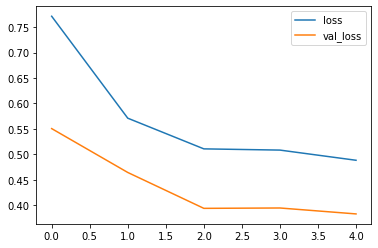

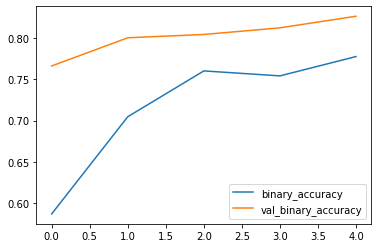

In [13]:
import pandas as pd

pd.DataFrame(history_4.history).loc[:, ['loss', 'val_loss']].plot();
pd.DataFrame(history_4.history).loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

### Make predictions

In [14]:
# Import the data into directory
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg

--2021-07-09 21:39:03--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2021-07-09 21:39:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2021-07-09 21:39:04 (17.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

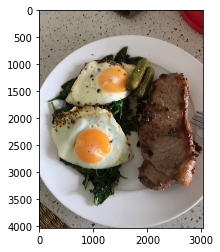

In [15]:
# Read the image from directory
steak = plt.imread('/content/03-steak.jpeg')
plt.imshow(steak);

In [16]:
steak.shape

(4032, 3024, 3)

In [17]:
# Define a function to load and prepare image
def load_and_prep_image(image_path, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and reshapes it 
  to (img_shape, img_shape, color_channels)
  """
  # Read file from the image_path
  img = tf.io.read_file(image_path)
  # Deconde the image inot tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img / 255.
  
  return img

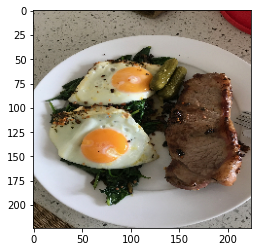

In [40]:
# Load and preprocess a custom image
steak = load_and_prep_image('/content/03-steak.jpeg')
plt.imshow(steak);

In [41]:
model_4.predict(tf.expand_dims(steak, axis=0))

array([[0.89684415]], dtype=float32)

In [20]:
# Predict the class name
class_names = {v:k for k, v in train_data_aug.class_indices.items()}
class_names

{0: 'pizza', 1: 'steak'}

In [42]:
class_names[int(tf.round(model_4.predict(tf.expand_dims(steak, axis=0))))]

'steak'

In [49]:
def pred_and_plot(model, file_path, class_names_dic):
  """
  Imports an image located at filepath, makes a prediction with the
  model, and plots the image with the predicted class as title
  """
  # Import the image from the file path
  img = load_and_prep_image(file_path)

  # Use the model to predict the class the image belongs to
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names_dic[int(tf.round(pred))]  

  # Plot the image with class name as title
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

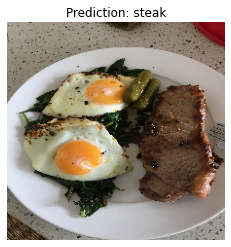

In [50]:
pred_and_plot(model_4, '/content/03-steak.jpeg', {0: 'pizza', 1: 'steak'})

In [51]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg

--2021-07-09 23:59:19--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg [following]
--2021-07-09 23:59:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2021-07-09 23:59:20 (19.5 MB/s) - ‘03-pizza-dad.jpe

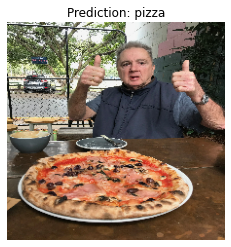

In [52]:
pred_and_plot(model_4, '/content/03-pizza-dad.jpeg', {0: 'pizza', 1: 'steak'})